Supervised vs. Unsupervised Learning
===============================
- Supervised Learning: training data includes the correct answer
    - Classification: identify which category an object belongs to
    - Regression: predict a continuous value
        - Linear Regression
        - Logistic Regression
        
- Unsupervised Learning: training data is not labeled
    - Clustering: group similar objects

Linear Regression with One Variable
===============================
f(x) = wx + b

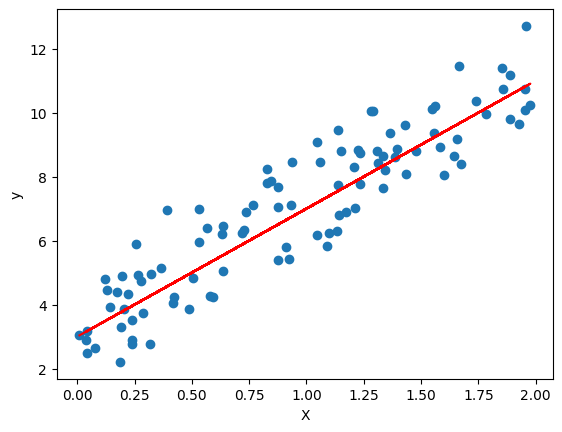

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

w = 4
b = 3

# Plot f(x) along the data
plt.scatter(X, y)
plt.plot(X, w*X + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Cost Function
===============================
m = number of training examples
J(w, b) = 1/2m * sum(y^ — y)^2
J(w, b) = 1/2m * sum((wx + b - y)^2)

Goal: minimize J(w, b)
in the case of linear regression, we can use the Mean Squared Error (MSE) as the cost function

note: 'cost' means the same thing as 'loss' or 'error,'
    indicating how far off our predictions are from the actual values

in the following example, we can see that at w=4 and b=3, the cost function is at its minimum
that is, the red cross is at the lowest point of the cost function

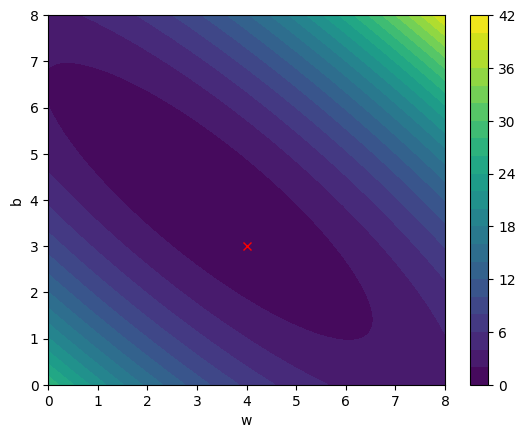

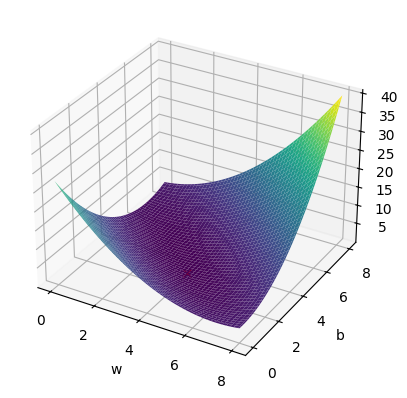

In [8]:
def compute_cost(X, y, w, b):
    """
    J(w, b) = 1/2m * sum((wx + b - y)^2)
    """
    m = len(y)
    J = 1/(2*m) * np.sum((w*X + b - y)**2)
    return J

# iterate over w and b to plot the cost function
w_vals = np.linspace(0, 8, 100)
b_vals = np.linspace(0, 8, 100)
J_vals = np.zeros((len(w_vals), len(b_vals)))

for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        J_vals[i, j] = compute_cost(X, y, w_vals[i], b_vals[j])

# plot a contour plot of the cost function
plt.contourf(w_vals, b_vals, J_vals, levels=20, cmap='viridis')
plt.plot(w, b, c='red', marker='x')
plt.colorbar()
plt.xlabel('w')
plt.ylabel('b')
plt.show()

# plot a 3D surface plot of the cost function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w_vals, b_vals = np.meshgrid(w_vals, b_vals)
ax.plot_surface(w_vals, b_vals, J_vals, cmap='viridis')
ax.plot([w], [b], [compute_cost(X, y, w, b)], c='red', marker='x')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J')
plt.show()

Gradient Descent
===============================
- Start with some initial values for w and b
- Keep changing w and b to reduce J(w, b) until we hopefully end up at a minimum
- The direction to move w and b is given by the partial derivative of J(w, b) with respect to w and b
- The size of the step is determined by the learning rate
- The learning rate should be chosen carefully
- If the learning rate is too small, the algorithm will take a long time to converge
- If the learning rate is too large, the algorithm may overshoot the minimum

Batch Gradient Descent: compute the gradient of the cost function with respect to all training examples

algorithm:
- initialize w and b
- repeat until convergence:
    - w = w - alpha * dJ(w, b)/dw
    - b = b - alpha * dJ(w, b)/db

where alpha is the learning rate, and w and b are updated simultaneously

In [12]:
def compute_gradient(X, y, w, b):
    """
    dJ(w, b)/dw = 1/m * sum((wx + b - y) * x)
    dJ(w, b)/db = 1/m * sum(wx + b - y)
    """
    m = len(y)
    dw = 1/m * np.sum((w*X + b - y) * X)
    db = 1/m * np.sum(w*X + b - y)
    return dw, db

convergence_threshold = 0.00001

def gradient_descent_univariate(X, y, w, b, alpha):
    iter_counter = 0
    J = compute_cost(X, y, w, b)
    J_history = [J]
    while True:
        iter_counter += 1
        dw, db = compute_gradient(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        J_new = compute_cost(X, y, w, b)
        J_history.append(J_new)
        if abs(J - J_new) < convergence_threshold:
            print(f'Converged after {iter_counter} iterations')
            break
        J = J_new
    return w, b, J_history
    
alpha = 1.0e-2
w, b, J_history = gradient_descent_univariate(X, y, 0, 0, alpha)
print(f'w: {w}, b: {b}')

Converged after 296 iterations
w: 3.868342443957626, b: 3.319032824229764


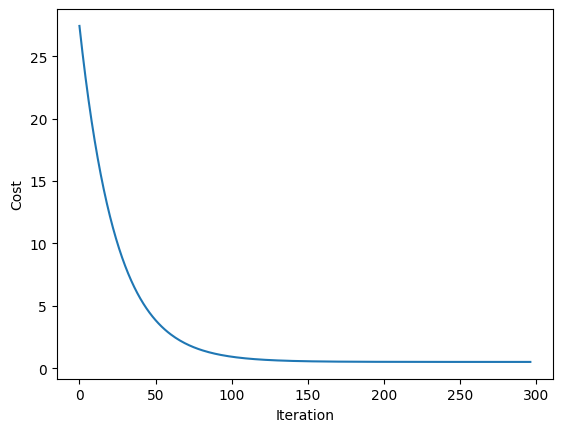

In [13]:
# plot cost versus iteration
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

Notice that the cost function decreases with each iteration
because initially the derivative of the cost function is large, the algorithm takes large steps